<a href="https://colab.research.google.com/github/Naga-SDonepudi/PyTorch_HandsOn/blob/main/04_Computer_Vision_and_CNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Computer Vision using PyTorch

### Libraries
* **torchvision** : base domain library with pre trained models for computer vision (consists of popular datasets, model architectures, and common image transformations for computer vision)
* Another different libraries are:
  * **torchvision.dataset**,
  * **torchvision.models**,
  * **torchvision.transforms**,
  * **torch.utils.data.Dataset**,
  * **torch.utils.data.DataLoader**

In [1]:
## Importing torch and torchvision
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

## Importing matplotlib for visualizing and plotting
import matplotlib.pyplot as plt

In [2]:
print(torch.__version__)
print(torchvision.__version__)

2.9.0+cpu
0.24.0+cpu


### Aim is to build a computer vision model to find patterns in training data, and use the model to predict on test data
### 1. Loading a Dataset
* Importing a FashionMNIST dataset from torchvision.datasets
* The datasets found in torchvision.datasets are splitted to training and test sets

In [3]:
## Train Data
train_data = datasets.FashionMNIST(
    root="data", # where to download data to
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 11.4MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 189kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.59MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 8.84MB/s]


In [4]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
image.shape, label

(torch.Size([1, 28, 28]), 9)

### 1.2 Visulazing the data

Image Shape: torch.Size([1, 28, 28])


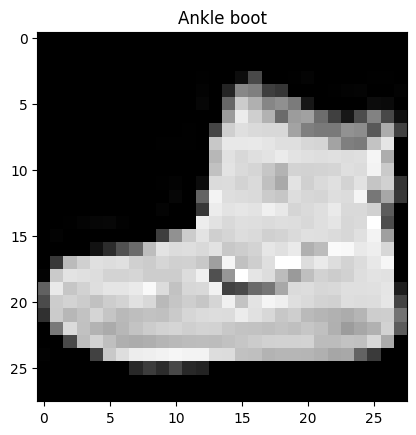

In [7]:
image, label = train_data[0]
print(f"Image Shape: {image.shape}")

plt.imshow(image.squeeze(), cmap="grey")
plt.title(class_names[label]);

In [9]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [10]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

### 2. Preparing DataLoader
* DataLoader turns the data into a Python iterbale.
* Turning the data into mini batches, which can be computationally efficient
* So breaking down to batch size of 44 common batch size is 32) ie 44 images/samples at a time
* By doing this, it gives the NN more chances to update its gradients per epoch

In [20]:
from torch.utils.data import DataLoader

# Setting up an hyperparameter of batch size
BATCH_SIZE = 44

# Turning dataset to iterables
train_dataloader = DataLoader(dataset=train_data,
                              batch_size = BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x78815ada69c0>,
 <torch.utils.data.dataloader.DataLoader at 0x78815ada4830>)

In [21]:
# Checking out whats going on
print(f"DataLoaders: {train_dataloader, test_dataloader}")

print(f"Length of the train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x78815ada69c0>, <torch.utils.data.dataloader.DataLoader object at 0x78815ada4830>)
Length of the train dataloader: 1364 batches of 44
Length of test dataloader: 228 batches of 44


In [23]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([44, 1, 28, 28]), torch.Size([44]))

### 3. Building a baseline model
*  A baseline model is a simple model that gives a meaningfull performance refernce, and can be improved upon experiments
* Used a Flatten layer, which converts a multi-dim tensor to a 1D vector so that can be fed into a linear layer (which cant handle multi dimensional data)

In [27]:
# Started by creating a flatten layer
flatten_model = nn.Flatten()

x = train_features_batch[0]

# Flattening the sample
output = flatten_model(x)

print(f"Shape before Flattening: {x.shape}")
print(f"Shape after Flattening: {output.shape}")

Shape before Flattening: torch.Size([1, 28, 28])
Shape after Flattening: torch.Size([1, 784])
